In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df_coffe = pd.read_csv("coffee-prices-historical-chart-data.csv")
df_coffe
df_coffe["value"].isna().sum()
df_coffe[df_coffe["value"].isna()]
df_coffe["value"] = df_coffe["value"].interpolate(method="linear")
df_coffe

,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660
...,...,...
12163,2022-02-07,2.3790
12164,2022-02-08,2.3790
12165,2022-02-09,2.3790
12166,2022-02-10,2.3790


In [8]:
# Crear nueva columna con precio por kilo (USD/kg)
df_coffe["precio_kg"] = df_coffe["value"] / 0.453592

# Ver las primeras filas
print(df_coffe.head())


         date   value  precio_kg
0  1973-08-20  0.6735   1.484815
1  1973-08-21  0.6710   1.479303
2  1973-08-22  0.6580   1.450643
3  1973-08-23  0.6675   1.471587
4  1973-08-24  0.6660   1.468280


In [10]:
# Tipo de cambio USD -> EUR
tipo_cambio = 0.92

# Crear nueva columna con precio en EUR/kg
df_coffe["precio_eur_kg"] = df_coffe["precio_kg"] * tipo_cambio

# Ver primeras filas
print(df_coffe.head())
df_coffe

         date   value  precio_kg  precio_eur_kg
0  1973-08-20  0.6735   1.484815       1.366029
1  1973-08-21  0.6710   1.479303       1.360959
2  1973-08-22  0.6580   1.450643       1.334591
3  1973-08-23  0.6675   1.471587       1.353860
4  1973-08-24  0.6660   1.468280       1.350817


,date,value,precio_kg,precio_eur_kg
0,1973-08-20,0.6735,1.484815,1.366029
1,1973-08-21,0.6710,1.479303,1.360959
2,1973-08-22,0.6580,1.450643,1.334591
3,1973-08-23,0.6675,1.471587,1.353860
4,1973-08-24,0.6660,1.468280,1.350817
...,...,...,...,...
12163,2022-02-07,2.3790,5.244801,4.825217
12164,2022-02-08,2.3790,5.244801,4.825217
12165,2022-02-09,2.3790,5.244801,4.825217
12166,2022-02-10,2.3790,5.244801,4.825217


In [12]:
df_coffe["date"] = pd.to_datetime(df_coffe["date"])  # asegurarnos que es datetime
df_coffe["year"] = df_coffe["date"].dt.year
df_coffe

,date,value,precio_kg,precio_eur_kg,year
0,1973-08-20,0.6735,1.484815,1.366029,1973
1,1973-08-21,0.6710,1.479303,1.360959,1973
2,1973-08-22,0.6580,1.450643,1.334591,1973
3,1973-08-23,0.6675,1.471587,1.353860,1973
4,1973-08-24,0.6660,1.468280,1.350817,1973
...,...,...,...,...,...
12163,2022-02-07,2.3790,5.244801,4.825217,2022
12164,2022-02-08,2.3790,5.244801,4.825217,2022
12165,2022-02-09,2.3790,5.244801,4.825217,2022
12166,2022-02-10,2.3790,5.244801,4.825217,2022


In [13]:
precios_anuales = df_coffe.groupby("year")["precio_eur_kg"].mean()


In [14]:
variacion_anual = precios_anuales.pct_change() * 100



In [16]:
df_variacion = pd.DataFrame({
    "precio_medio_eur_kg": precios_anuales,
    "variacion_%": variacion_anual
})
df_variacion["variacion_%"] = df_variacion["variacion_%"].round(1)
print(df_variacion.head(15))  # primeros 15 años


      precio_medio_eur_kg  variacion_%
year                                  
1973             1.332821          NaN
1974             1.359260          2.0
1975             1.331471         -2.0
1976             2.890137        117.1
1977             4.698694         62.6
1978             3.171638        -32.5
1979             3.602688         13.6
1980             3.212903        -10.8
1981             2.482138        -22.7
1982             2.751286         10.8
1983             2.665013         -3.1
1984             2.910351          9.2
1985             3.013565          3.5
1986             4.047949         34.3
1987             2.362214        -41.6


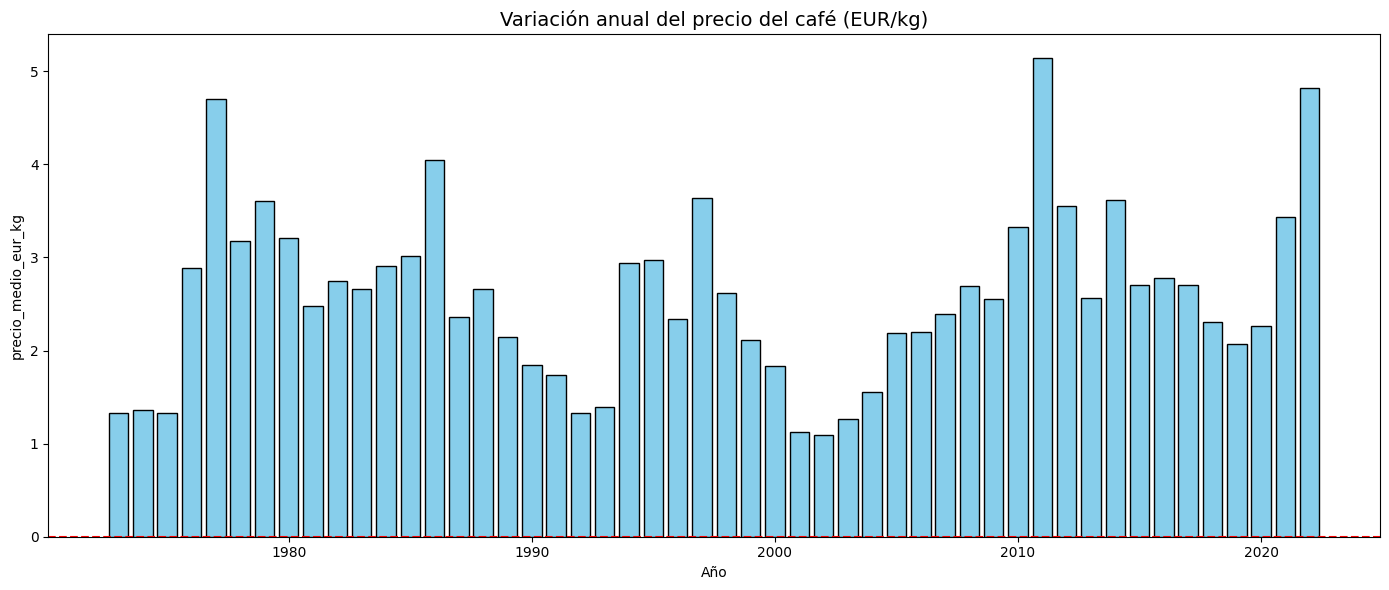

In [21]:
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame ya se llama df_variacion
# y tiene columnas: precio_medio_eur_kg y variacion_%

plt.figure(figsize=(14,6))
plt.bar(df_variacion.index, df_variacion["precio_medio_eur_kg"], color="skyblue", edgecolor="black")

plt.axhline(0, color="red", linestyle="--")  # línea de referencia en 0%
plt.title("Variación anual del precio del café (EUR/kg)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("precio_medio_eur_kg")
plt.tight_layout()
plt.show()


### 1976 (+117%) → fue un año clave: una gran helada en Brasil destrozó la cosecha y disparó los precios.

### 1977 (+62%) → arrastre de la misma crisis, los precios siguieron altos.

### 1978 (–32%) → recuperación de la producción → el precio se desplomó.

### 1986 (+34%) → otra crisis de oferta, subida fuerte.

### 1987 (–41%) → sobreproducción, se vino abajo.

### El café es uno de los productos agrícolas más volátiles porque depende muchísimo de:

### Clima en Brasil (principal productor mundial).

### Plagas/enfermedades (ej. roya del café).

### Política de exportación (acuerdos internacionales).

### Demanda global (EE.UU., Europa, Japón y, más tarde, China).


🔹 2011 → pico histórico

Precio del café superó los 3 USD/lb (~6,5 €/kg).

Causas principales:

Sequías en Brasil y Colombia → menos producción.

Alta demanda global (EE.UU., Europa, Japón).

Problemas en África (Costa de Marfil y Etiopía).

Resultado: el café alcanzó su nivel más alto desde 1977.

🔹 2022 → nuevo repunte fuerte

Precio se fue por encima de 2,5 USD/lb (~5 €/kg).

Causas principales:

Heladas y sequías en Brasil en 2021/22 → destrozaron la cosecha.

Problemas logísticos globales tras la pandemia (fletes carísimos).

Escasez de mano de obra en países productores.

Aumento de costes de fertilizantes y energía (guerra en Ucrania).

Resultado: una de las subidas más rápidas en décadas.

1) Preparación de datos


In [35]:
# Si faltara scikit-learn:
# !pip install scikit-learn

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score


# Creamos un DataFrame solo con la columna de interés
serie = df["precio_eur_kg"].copy()

# Features: lags (ayer, hace 7 días, hace 30 días)
df_features = pd.DataFrame({
    "lag_1": serie.shift(1),
    "lag_7": serie.shift(7),
    "lag_30": serie.shift(30),
    "target": serie
}).dropna()

In [36]:
split_idx = int(len(df_features) * 0.8)

X_train = df_features[["lag_1", "lag_7", "lag_30"]].iloc[:split_idx]
y_train = df_features["target"].iloc[:split_idx]

X_test = df_features[["lag_1", "lag_7", "lag_30"]].iloc[split_idx:]
y_test = df_features["target"].iloc[split_idx:]


In [41]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [42]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f} EUR/kg")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.3f}")


MAE: 0.047 EUR/kg
MAPE: 1.67%
R²: 0.990


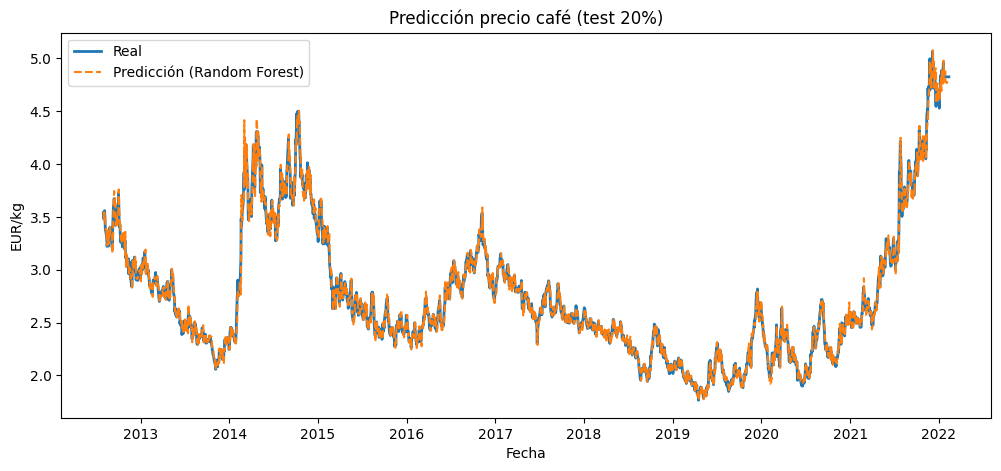

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Real", linewidth=2)
plt.plot(y_test.index, y_pred, label="Predicción (Random Forest)", linestyle="--")
plt.title("Predicción precio café (test 20%)")
plt.xlabel("Fecha")
plt.ylabel("EUR/kg")
plt.legend()
plt.show()


In [40]:
fecha = "2020-01-15"
fila = df_features.loc[fecha, ["lag_1", "lag_7", "lag_30"]].values.reshape(1, -1)
prediccion = rf.predict(fila)
print("Predicción:", prediccion[0], "EUR/kg")
print("Valor real:", df_features.loc[fecha, "target"], "EUR/kg")


Predicción: 2.3509102012381153 EUR/kg
Valor real: 2.3182948552884532 EUR/kg


C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


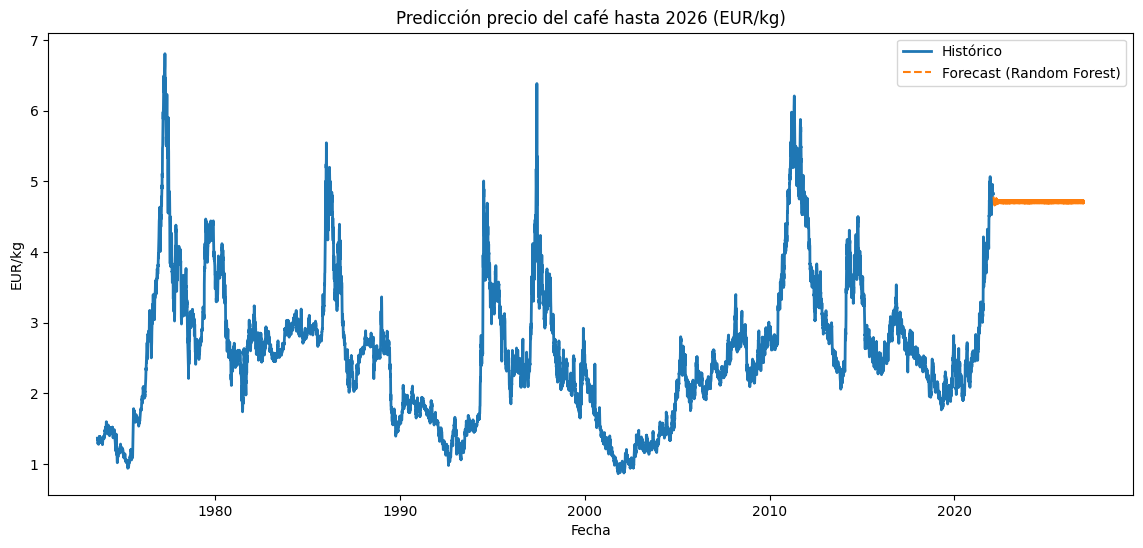

Primeros meses del forecast:
 2022-02-01    4.716566
2022-03-01    4.701503
2022-04-01    4.710990
2022-05-01    4.708387
2022-06-01    4.712059
Freq: MS, Name: pred_eur_kg, dtype: float64 

Últimos meses del forecast:
 2026-08-01    4.711065
2026-09-01    4.710482
2026-10-01    4.709839
2026-11-01    4.710493
2026-12-01    4.711051
Freq: MS, Name: pred_eur_kg, dtype: float64
Predicción para 20/09/2025: 4.69140247623415 EUR/kg


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================
# 1) Preparamos la serie con frecuencia diaria
# ============================================
serie_ext = df["precio_eur_kg"].asfreq("D")         # fuerza frecuencia diaria
serie_ext = serie_ext.interpolate("time")           # rellena huecos linealmente

# Ahora serie_ext tiene TODAS las fechas diarias desde 1973 hasta 2022.

# ============================================
# 2) Definimos horizonte de predicción
# ============================================
forecast_end = "2026-12-31"   # fecha límite de forecast
future_dates = pd.date_range(start=serie_ext.index[-1] + pd.Timedelta(days=1),
                             end=forecast_end, freq="D")
# future_dates = todas las fechas desde el día siguiente al último dato real hasta 2026.

# ============================================
# 3) Bucle de predicción recursiva
# ============================================
preds = []   # aquí guardaremos las predicciones

for d in future_dates:
    # a) Creamos las features para la fecha d usando lags
    fila = pd.DataFrame({
        "lag_1":  [serie_ext.loc[d - pd.Timedelta(days=1)]],   # ayer
        "lag_7":  [serie_ext.loc[d - pd.Timedelta(days=7)]],   # hace 7 días
        "lag_30": [serie_ext.loc[d - pd.Timedelta(days=30)]]   # hace 30 días
    }, index=[d])
    
    # b) Predicción con el modelo Random Forest
    yhat = rf.predict(fila)[0]
    
    # c) Guardamos la predicción
    preds.append(yhat)
    
    # d) Añadimos la predicción a la serie extendida
    #    -> clave: servirá como lag_1 para el siguiente día
    serie_ext.loc[d] = yhat

# ============================================
# 4) Convertimos predicciones a Serie independiente
# ============================================
forecast_series = pd.Series(preds, index=future_dates, name="pred_eur_kg")

# ============================================
# 5) Gráfico histórico + forecast
# ============================================
plt.figure(figsize=(14,6))
plt.plot(df["precio_eur_kg"], label="Histórico", linewidth=2)
plt.plot(forecast_series, label="Forecast (Random Forest)", linestyle="--")
plt.title("Predicción precio del café hasta 2026 (EUR/kg)")
plt.xlabel("Fecha")
plt.ylabel("EUR/kg")
plt.legend()
plt.show()

# ============================================
# 6) (Opcional) Ver la serie mensual
# ============================================
forecast_monthly = forecast_series.resample("MS").mean()
print("Primeros meses del forecast:\n", forecast_monthly.head(), "\n")
print("Últimos meses del forecast:\n", forecast_monthly.tail())

# ============================================
# 7) Predicción en una fecha concreta
# ============================================
fecha_objetivo = pd.to_datetime("2025-09-20")
print("Predicción para 20/09/2025:", serie_ext.loc[fecha_objetivo], "EUR/kg")



In [45]:
from datetime import datetime

# Fecha objetivo
fecha_objetivo = pd.to_datetime("2025-09-20")

# Generamos las fechas desde el último dato hasta la fecha objetivo
future_dates = pd.date_range(start=serie_ext.index[-1] + pd.Timedelta(days=1),
                             end=fecha_objetivo, freq="D")

# Hacemos el bucle recursivo solo hasta esa fecha
for d in future_dates:
    fila = pd.DataFrame({
        "lag_1": [serie_ext.loc[d - pd.Timedelta(days=1)]],
        "lag_7": [serie_ext.loc[d - pd.Timedelta(days=7)]],
        "lag_30": [serie_ext.loc[d - pd.Timedelta(days=30)]]
    }, index=[d])
    
    yhat = rf.predict(fila)[0]
    serie_ext.loc[d] = yhat  # lo añadimos para usarlo como lag después

# Al final, nuestra predicción está en la fecha deseada
print("Predicción para 20/09/2025:", serie_ext.loc[fecha_objetivo], "EUR/kg")


Predicción para 20/09/2025: 4.69140247623415 EUR/kg
